In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
h5_path = '../data/easycom/Easycom_N-1020_fs-48k_nrfft-1025.h5'

n_mics = 4
f = h5py.File(h5_path,'r')
fs = int(f["fs"][()])
doas = np.array(f['doas']) # (ndarray) [n_az x n_el x 2]
airs = np.array(f['airs'])[:,:,:n_mics,:]       # (ndarray) [n_az x n_el x n_chan x n_smpl]
atfs = np.array(f['atfs'])[...,:n_mics]         # (ndarray) [n_az x n_el x n_rfft x n_chan]
rtfs = np.array(f['rtfs'])[...,:n_mics,:n_mics] # (ndarray) [n_az x n_el x n_rfft x n_chan x n_chan]
mic_pos = np.array(f['mic_pos'])[:,:n_mics]     # (ndarray) [3 x n_chan]
f.close()

In [3]:
print(airs.shape)
print(atfs.shape)
print(rtfs.shape)

(60, 17, 4, 768)
(60, 17, 1025, 4)
(60, 17, 1025, 4, 4)


In [7]:
for i in range(n_mics):
    print(np.max(airs[:,:,i,:]))
    print(np.max(20*np.log10(np.abs(atfs[:,:,:,i]))))

2.4065198132731456
25.294666363677084
3.0829781930104367
26.990991980177622
2.3866367810776934
27.050338115761598
2.8885353858381193
27.582818245216593


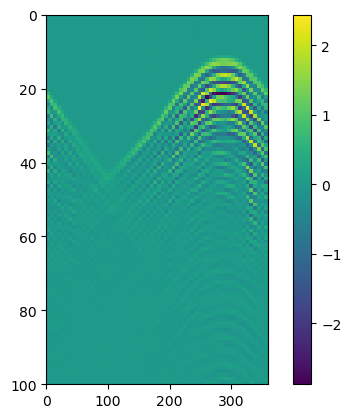

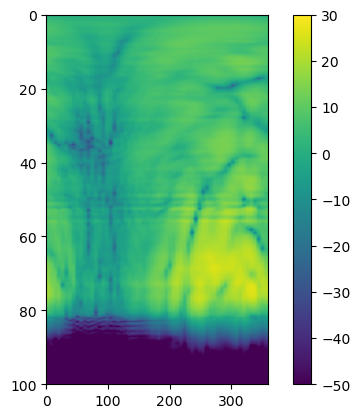

In [17]:
plt.imshow(airs[:,11,i,:100].T, extent=[0,360,100,0], aspect=6)
plt.colorbar()
plt.show()

plt.imshow(20*np.log10(np.abs(atfs[:,11,:,i])).T, extent=[0,360,100,0], aspect=6, vmin=-50, vmax=30)
plt.colorbar()
plt.show()


In [18]:
20*np.log10(1e-6)

-120.0